# FIT5212 S1 2021 
# Assessment 1: 


Student information

- Family Name:- Nagrale
- Given Name:- Prajyot


# Table of Contents:

1. **Part 1: Text Classification**

- 1.1. Mount google drive
- 1.2. Install Libraries
- 1.3. Import Libraries
- 1.4. Unzip file
- 1.5. Read Data All
- 1.6. Needed columns
- 1.7. Divide the data: 1000
- 1.8. Check data
- 1.9. TEXT PREPROCESSING
- - 1.9.1. Text Preprocesssing 1 : WITH STOPWORDS + WITH UPPERCASE + 1000 DATA
- - 1.9.2. TEXT PREPROCESSING 2 : NO STOPWORDS + NO UPPERCASE + 1000 DATA
- 1.10. Vectorization = TFIDF 
- - 1.10.1. Data size = 1000 : Text Pre = 1 + 2
- - 1.10.2. Data size = All : Text Pre = 1 + 2
- 1.11. Model = LinearSVC() : Task = InfoTheory + CompVis + Math
- - 1.11.1. Data size = 1000 : Text Pre = 1 + 2 : Task = InfoTheory + CompVis + Math : Evaluation = F1 + Precision + Recall
- - 1.11.2. Data size = All : Text Pre = 1 + 2 : Task = InfoTheory + CompVis + Math : Evaluation = F1 + Precision + Recall
- 1.12. RNN
- - 1.12.1. Copy data
- - 1.12.2 GPU set
- - 1.12.3. Read data : Data size = 1000
- - - 1.12.3.1 Read data : Text Preprocessing = 1 + 2 : Data size = 1000
- - - 1.12.4.1. Max Vocab : TP = 1 + 2 : Data size = 1000
- - -  1.12.5.1. Bucket Iterator : TP = 1 + 2 : Data size = 1000
- - 1.12.6. RNN + binary_accuracy + train + evaluate + epoch_time
- - 1.12.7. Model = RNN : Hyper Parameter + Optimizer = SGD + Criterion (loss) = BCEWithLogists
- - - 1.12.7.1. Data size = 1000 : Text Pre = 1 + 2 : Task = InfoTheory + CompVis + Math : Evaluation = F1 + Precision + Recall
- - - 1.12.3.2. Read data : Text Preprocessing = 1 + 2 : Data size = 1000
- - - 1.12.4.2. Max Vocab Size : Text Preprocessing = 1 + 2 : Data size = All
- - - 1.12.5.2. Bucket Iterator : TP = 1 + 2 : Data size = All
- - - 1.12.7.2. Data size = All : Text Pre = 1 + 2 : Task = InfoTheory + CompVis + Math : Evaluation = F1 + Precision + Recall

2. **Part 2: TOPIC MODELLING**
- 2.1. Text Preprocessing 
- - 2.1.1. Text Preprocessin = 1
- - 2.1.2. Text Preprocessin = 2
- 2.2. get_document_topics + top_topics
- 2.3. Divide data
- - 2.4.1 Model : Visualization : Article = 1000 : Text Preprocessin = 1
- - 2.5.1 Top topics : Article = 1000 : Text Preprocessin = 1
- - 2.4.2 Model : Visualization : Article = 1000 : Text Preprocessin = 2
- - 2.5.2 Top topics : Article = 1000 : Text Preprocessin = 2
- - 2.4.3 Model : Visualization : Article = 20,000 : Text Preprocessin = 1
- - 2.5.3 Top topics : Article = 20000 : Text Preprocessin = 1
- - 2.4.4 Model : Visualization : Article = 20,000 : Text Preprocessin = 2
- - 2.5.4 Top topics : Article = 20000 : Text Preprocessin = 2

# Part 1: Text Classification

## 1.1. Mount google drive

Mounting to google drive. Should do this step if using google colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2. Install Libraries

Packages which are not present or can need to install in system or google colab. 

In [2]:
# !pip install torch
# !pip install torchtext
# !pip3 install gensim

## 1.3. Import Libraries

In [3]:
# Library:
import pandas as pd
import zipfile
import numpy as np
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords 
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
stemmer = SnowballStemmer(language='english')
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, matthews_corrcoef
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#RNN
import os
import torch
from torchtext.legacy import data
from torch.utils.data import Dataset, DataLoader, random_split, SubsetRandomSampler, WeightedRandomSampler
from torchtext.legacy.data import TabularDataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

%matplotlib inline
import matplotlib.pyplot as plt

import time
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import LdaModel


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1.4. Unzip file

The below command unzip the zip data file to read the train and test csv file.  The ZIP file format is a standard for archiving and compressing data. This module includes utilities for creating, reading, writing, appending, and listing ZIP files.

In [4]:
# Google Colab
path_to_zip_file = "/content/drive/MyDrive/Colab Notebooks/assignment1_data.zip"
directory_to_extract_to = "./assignment1_data"

# Jupyter notebook
# path_to_zip_file = './assignment1_data.zip'
# directory_to_extract_to = './assignment1_data'

# Unzip the file
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

## 1.5. Read Data All

CSV files are an easy way to store large data sets (comma separated files). 

CSV files contain plain text and are a well-known format that everyone, even Pandas, can read. 

We'll use a CSV file named 'filename.csv' in our examples.

In [5]:
# Google Colab
train_all = pd.read_csv("./assignment1_data/axcs_train.csv")
test_all = pd.read_csv("./assignment1_data/axcs_test.csv")

# Jupyter notebook
# train_all = pd.read_csv("./assignment1_data/axcs_train.csv")
# test_all = pd.read_csv("./assignment1_data/axcs_test.csv")

## 1.6. Needed columns

The information was gathered from papers tagged as computer science material on the popular academic website arXiv.org (though some of these are in mathematics or physics categories). Training is from 1990 to 2014, and testing is from 2015 to 2016, with a little bit of 2016.

- ID: a unique alphanumeric ID.
- URL: a working URL if you prepend "http://".
- Date: the date in format YYYY-MM-DD.
- Title: the full title, though with non-ASCII characters modified and any "," deleted.
- InfoTheory: a "1" if it is classified as an Information Theorey article, otherwise "0".
- CompVis: a "1" if it is classified as a Computer Vision article, otherwise "0".
- Math: a "1" if it is classified as a Mathematics article as well, otherwise "0".
- Abstract: the full abstract, though with non-ASCII characters modified.

The three classes are InfoTheory, CompVis and Math which are set in boolean variable as 0 or 1.

Using the Abstract field, create text classifiers that predict each of these three classes separately.

In [6]:
train_all = train_all[['InfoTheory', 'CompVis', 'Math', 'Abstract']]
test_all = test_all[['InfoTheory', 'CompVis', 'Math', 'Abstract']]

In [7]:
train_all.head(2)

,InfoTheory,CompVis,Math,Abstract
0,0,0,0,Nested satisfiability A special case of the s...
1,0,0,0,A note on digitized angles We study the confi...


In [8]:
test_all.head(2)

,InfoTheory,CompVis,Math,Abstract
0,0,0,0,A Data Transparency Framework for Mobile Appl...
1,0,0,0,A reclaimer scheduling problem arising in coa...


## 1.7. Divide the data: 1000

Python is an excellent language for data processing, thanks to its vast ecosystem of data-centric Python packages. One of these packages is Pandas, which makes importing and analysing data a lot simpler. 

Pandas sample() is used to produce a random row or column from the data frame of the function caller.

We are creating 1000 sample from training dataset. We are also setting the random_state = 5 because it should get the same number of random sample for each and every time. 



In [9]:
train_1000 = train_all.sample(n=1000, random_state=5)
print(train_1000.shape)

(1000, 4)


In [10]:
train_1000.reset_index(drop=True, inplace=True)

## 1.8. Check data

In [11]:
train_1000.head(2)

,InfoTheory,CompVis,Math,Abstract
0,0,0,1,On the notion of balance in social network an...
1,0,0,0,Complexity in Prefix-Free Regular Languages W...


In [12]:
test_all.head(2)

,InfoTheory,CompVis,Math,Abstract
0,0,0,0,A Data Transparency Framework for Mobile Appl...
1,0,0,0,A reclaimer scheduling problem arising in coa...


In [13]:
# Read first abstract:
first_dialogue = train_1000['Abstract'].iloc[0]
first_dialogue

" On the notion of balance in social network analysis The notion of balance is fundamental for sociologists who study social networks. In formal mathematical terms, it concerns the distribution of triad configurations in actual networks compared to random networks of the same edge density. On reading Charles Kadushin's recent book Understanding Social Networks , we were struck by the amount of confusion in the presentation of this concept in the early sections of the book. This confusion seems to lie behind his flawed analysis of a classical empirical data set, namely the karate club graph of Zachary. Our goal here is twofold. Firstly, we present the notion of balance in terms which are logically consistent, but also consistent with the way sociologists use the term. The main message is that the notion can only be meaningfully applied to undirected graphs. Secondly, we correct the analysis of triads in the karate club graph. This results in the interesting observation that the graph is

## 1.9. TEXT PREPROCESSING

### 1.9.1. Text Preprocesssing 1 : WITH STOPWORDS + WITH UPPERCASE + 1000 DATA

First I'm tokenizing the data then lowering the case of each word and finally stemming it with snowball stemming. 

Machine Learning, as we all know, needs numeric data. To convert text to a numeric vector, we used encoding techniques (BagOfWord, Bi-gram, n-gram, TF-IDF, Word2Vec). However, before encoding, we must first clean the text data; this method of preparing (or cleaning) text data before encoding is known as text preprocessing, and it is the first step in solving NLP problems.

We are using NLTK because it is a popular Python programming language for working with human language data. It includes a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion platform, as well as easy-to-use interfaces to over 50 corpora and lexical tools like WordNet.

I tried using SPACY, it is more accurate and reliable but takes alot of time to run. As our dataset is huge. So i didn't took SPACY.

In [14]:
# WITH STOPWORDS + WITH UPPERCASE + 1000 DATA
class StemTokenizerNltk(object):
    def __call__(self,doc):
        trydoc = word_tokenize(doc)
        return [stemmer.stem(token.lower()) for token in trydoc] 

### 1.9.2. TEXT PREPROCESSING 2 : NO STOPWORDS + NO UPPERCASE + 1000 DATA

First I'm tokenizing the data then removing stopwords and lemmatizing the data.

`Stemming`: Stemming is unquestionably the easier of the two methods. Words are reduced to their word stems while stemming is used. A word stem does not have to be the same root as a dictionary-based morphological root; it simply needs to be the same size as or smaller than the word.

`Lemmatization`: It entails returning words to their dictionary definitions. A word's lemma is actually its dictionary or canonical form!

In [15]:
class LemmaTokenizerNltkStopwordsremoval(object):
    def __call__(self,doc):
        trydoc = word_tokenize(doc)
        return [lemmatizer.lemmatize(token) for token in trydoc if not token in stop_words]

## 1.10. Vectorization = TFIDF 

The tf-idf weight is a weight commonly used in information retrieval and text mining. Tf-idf stands for word frequency-inverse document frequency. This weight is a statistical metric for determining the importance of a word in a list or corpus of documents. The value of a word rises in direct proportion to the number of times it appears in the text, but is counterbalanced by its frequency in the corpus. Search engines often use variations of the tf-idf weighting scheme as a core tool in scoring and rating a document's importance in response to a user question.

### 1.10.1. Data size = 1000 : Text Pre-processing = 1 + 2

In [16]:
# TF_IDF
# WITH STOPWORDS + WITH UPPERCASE + 1000 DATA
vectorizer_1 = TfidfVectorizer(lowercase = False, tokenizer = StemTokenizerNltk())
# TF-IDF
vectorizer_2 = TfidfVectorizer(lowercase = False, tokenizer = LemmaTokenizerNltkStopwordsremoval())

# TRAIN DATA 1000 data
# Text Preprocessing 1: 
# Use the same vectorizer to transform the test set
np_train_1_1 = train_1000.Abstract.tolist() 
x_train_1_1 = vectorizer_1.fit_transform(np_train_1_1)
# TEST DATA
# Use the same vectorizer to transform the test set
np_test_1_1 = test_all.Abstract.tolist() 
x_test_1_1 = vectorizer_1.transform(np_test_1_1)

# Text Preprocessing 2:
# Use the same vectorizer to transform the test 
np_train_1_2 = train_1000.Abstract.tolist() 
x_train_1_2 = vectorizer_2.fit_transform(np_train_1_2)
# TEST DATA
# Use the same vectorizer to transform the test set
np_test_1_2 = test_all.Abstract.tolist() 
x_test_1_2 = vectorizer_2.transform(np_test_1_2)

### 1.10.2. Data size = All : Text Preprocessing = 1 + 2

In [17]:
# TP1
# TRAIN DATA ALL DATA
# Use the same vectorizer to transform the test set
np_train_all_1 = train_all.Abstract.tolist()
x_train_all_1 = vectorizer_1.fit_transform(np_train_all_1)
# TEST DATA
# Use the same vectorizer to transform the test set
np_test_all_1 = test_all.Abstract.tolist() 
x_test_all_1 = vectorizer_1.transform(np_test_all_1)
#TP2
# TRAIN DATA
# Use the same vectorizer to transform the test set
np_train_all_2 = train_all.Abstract.tolist()
x_train_all_2 = vectorizer_2.fit_transform(np_train_all_2)
# TEST DATA
# Use the same vectorizer to transform the test set
np_test_all_2 = test_all.Abstract.tolist() 
x_test_all_2 = vectorizer_2.transform(np_test_all_2)

## 1.11. Model = LinearSVC() : Task = InfoTheory + CompVis + Math

Linear Support Vector Classification is a form of classification that uses linear support vectors. 

Similar to SVC with the kernel='linear' parameter, but implemented in liblinear rather than libsvm, giving it more versatility in terms of penalties and loss functions, as well as the ability to scale to large numbers of samples. 

This class accepts both dense and sparse data, and multiclass support is implemented using a one-vs-all approach.

In [18]:
label = ['InfoTheory', 'CompVis', 'Math']
models = LinearSVC()

### 1.11.1. Data size = 1000 : Text Pre = 1 + 2 : Task = InfoTheory + CompVis + Math : Evaluation = F1 + Precision + Recall


		TEXT PREPROCESSING 1 : LinearSVC : InfoTheory
InfoTheory
	F1 score:0.8516684419882723
	Precision: 0.9204761869749701
	Recall: 0.8101595635221042

		TEXT PREPROCESSING 1 : LinearSVC : CompVis
CompVis
	F1 score:0.791918605235738
	Precision: 0.9423012345113944
	Recall: 0.7275201219897618

		TEXT PREPROCESSING 1 : LinearSVC : Math
Math
	F1 score:0.7763204517945728
	Precision: 0.8206135408655413
	Recall: 0.7553872622159115

		TEXT PREPROCESSING 2 : LinearSVC : InfoTheory
InfoTheory
	F1 score:0.8432373451614041
	Precision: 0.9232193434418359
	Recall: 0.7982513039901797

		TEXT PREPROCESSING 2 : LinearSVC : CompVis
CompVis
	F1 score:0.7588319273046163
	Precision: 0.9419339978916588
	Recall: 0.6944622795150445

		TEXT PREPROCESSING 2 : LinearSVC : Math
Math
	F1 score:0.7713994058592228
	Precision: 0.8272611707453533
	Recall: 0.7481058351703832


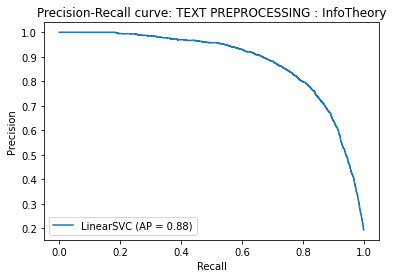

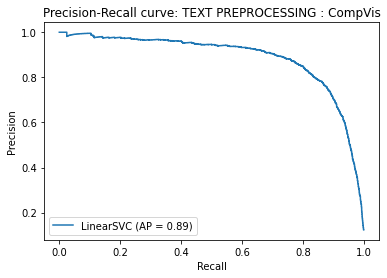

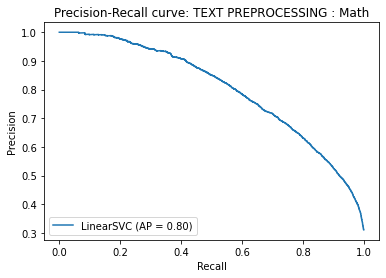

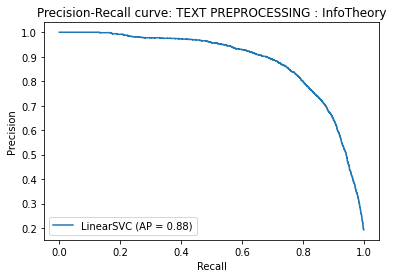

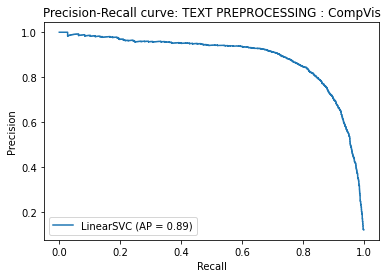

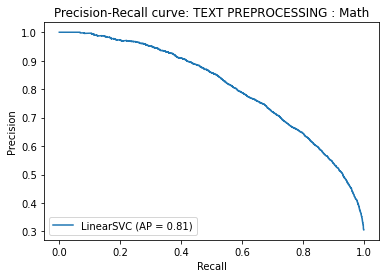

In [19]:
for pre_processing_step in [1, 2]:
    if pre_processing_step == 1:
        x_train = x_train_1_1
        x_test = x_test_1_1
    if pre_processing_step == 2:
        x_train = x_train_1_2
        x_test = x_test_1_2
    
    for target in label:
        y_train = np.asarray(getattr(train_1000, target).tolist())
        y_test = np.asarray(getattr(test_all, target).tolist())

        clf = models
        model_name = clf.__class__.__name__
        clf.fit(x_train, y_train)
        # Do the prediction
        y_predict=clf.predict(x_test)
        recall=recall_score(y_test,y_predict,average='macro')
        precision=precision_score(y_test,y_predict,average='macro')
        f1score=f1_score(y_test,y_predict,average='macro')
        accuracy=accuracy_score(y_test,y_predict)
        print("\n\t\tTEXT PREPROCESSING", pre_processing_step, ":", model_name, ":", target)
        print(target)
        print('\tF1 score:'+ str(f1score))
        print('\tPrecision: '+ str(precision))
        print('\tRecall: '+ str(recall))

        disp = plot_precision_recall_curve(clf, x_test, y_test)
        disp.ax_.set_title('Precision-Recall curve: TEXT PREPROCESSING : {:}'.format(target))


The above statistical evalualuation matrix shows us that the Linear SVC is better for first text preprocessing with little margin. F1, precision and recall score shows has higher value for first text preprocessing then second one. 

We are also able to see from the precision recall curve that the model has been able to predic better for some targets variable better then the others. 

### 1.11.2. Data size = All : Text Pre = 1 + 2 : Task = InfoTheory + CompVis + Math : Evaluation = F1 + Precision + Recall


		TEXT PREPROCESSING 1 : LinearSVC :
InfoTheory
	F1 score:0.9172433426403417
	Precision: 0.9373367121526063
	Recall: 0.9000400859556387

		TEXT PREPROCESSING 1 : LinearSVC :
CompVis
	F1 score:0.9166091694704182
	Precision: 0.956165109249612
	Recall: 0.8849300158193011

		TEXT PREPROCESSING 1 : LinearSVC :
Math
	F1 score:0.8457458455914552
	Precision: 0.8553703524130765
	Recall: 0.837816851238457

		TEXT PREPROCESSING 2 : LinearSVC :
InfoTheory
	F1 score:0.917135242820906
	Precision: 0.9351443674098026
	Recall: 0.9014916135263464

		TEXT PREPROCESSING 2 : LinearSVC :
CompVis
	F1 score:0.9150100730443619
	Precision: 0.9566576266225006
	Recall: 0.8820236858929081

		TEXT PREPROCESSING 2 : LinearSVC :
Math
	F1 score:0.8440549896256138
	Precision: 0.8521340181217294
	Recall: 0.8372267914732101


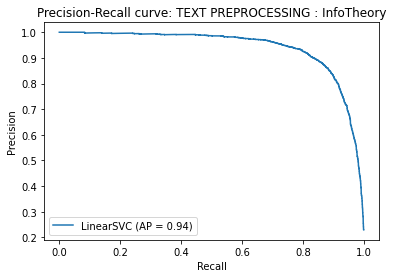

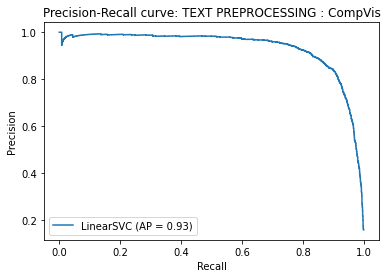

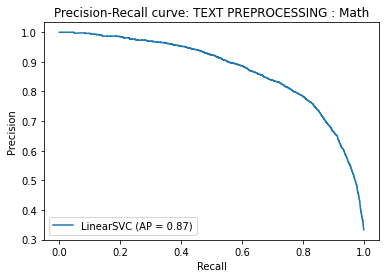

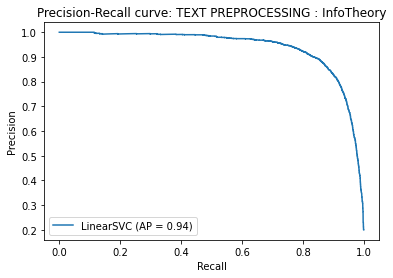

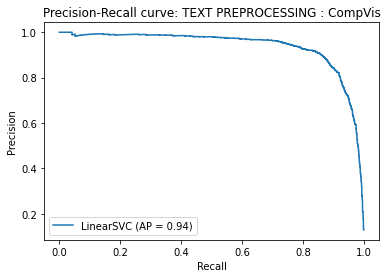

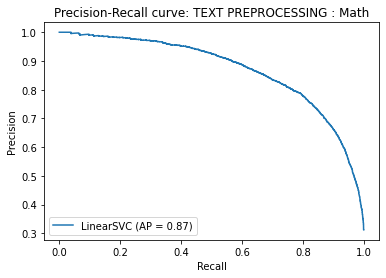

In [20]:
for pre_processing_step in [1, 2]:
    if pre_processing_step == 1:
        x_train = x_train_all_1
        x_test = x_test_all_1
    if pre_processing_step == 2:
        x_train = x_train_all_2
        x_test = x_test_all_2
    
    for target in label:
        y_train = np.asarray(getattr(train_all, target).tolist())
        y_test = np.asarray(getattr(test_all, target).tolist())

        clf = models
        model_name = clf.__class__.__name__
        clf.fit(x_train, y_train)
        # Do the prediction
        y_predict=clf.predict(x_test)
        recall=recall_score(y_test,y_predict,average='macro')
        precision=precision_score(y_test,y_predict,average='macro')
        f1score=f1_score(y_test,y_predict,average='macro')

        print("\n\t\tTEXT PREPROCESSING", pre_processing_step, ":", model_name, ":")
        print(target)
        print('\tF1 score:'+ str(f1score))
        print('\tPrecision: '+ str(precision))
        print('\tRecall: '+ str(recall))

        disp = plot_precision_recall_curve(clf, x_test, y_test)
        disp.ax_.set_title('Precision-Recall curve: TEXT PREPROCESSING : {:}'.format(target))

From the above plot we can see that the statistical measures has been increased from the 1000 dataset. This means that, when the size of the data increase the model prediction also increases. 

From the curve we are also able to see that the first text preprocessing is better then the second text preprocessing.

## 1.12. RNN

One of the most common machine learning algorithms, neural networks outperform other algorithms in terms of accuracy and speed. As a result, having a thorough understanding of what a Neural Network is, how it works, and what its capabilities and limitations are becomes important. A Recurrent Neural Network is based on the concept of saving a layer's output and feeding it back to the input in order to predict the layer's output. 

### 1.12.1. Copy data

In [21]:
# Google Colab: 
PATH_1 = r'./sample_1000/' 
if not os.path.isdir(PATH_1):
  os.makedirs(PATH_1)
# PATH_1 = r'./sample1000'
# if not os.path.isdir(PATH_1):
#     os.makedirs(PATH_1)
train_1000.to_csv('./sample_1000/train_1000.csv', index = False)
test_all.to_csv('./sample_1000/test_all.csv', index = False)

# train_1000.to_csv('./sample1000/train_1000.csv', index = False)
# test_all.to_csv('./sample1000/test_all.csv', index = False)

### 1.12.2 GPU set

In [22]:
# If there's a GPU available...
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


### 1.12.3. Read data : Data size = 1000

We are using PyTorch for reading the RNN model: 

Torch is an open-source machine learning package based on the programming language Lua, and PyTorch is a Python machine learning package based on Torch. PyTorch has two primary characteristics: Automatic differentiation for building and training neural networks; Tensor computation (like NumPy) with high GPU acceleration. PyTorch has a distinct method for creating neural networks. PyTorch also encourages distributed teaching, allowing researchers and clinicians to parallelize their work. Using several GPUs to process larger batches of input data is possible with distributed training. As a result, the computing time is reduced. As a result, the computing time is reduced. It generates dynamic computation graphs, which means that the graph is generated in real time.

#### 1.12.3.1 Read data : Text Preprocessing = 1 + 2 : Data size = 1000

In [23]:
SEED = 1234
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

LABEL_1 = data.LabelField(dtype = torch.float, use_vocab=False, preprocessing=int)
TEXT_1 = data.Field(tokenize = StemTokenizerNltk(), sequential=True, lower=False)
LABEL_2 = data.LabelField(dtype = torch.float, use_vocab=False, preprocessing=int)
TEXT_2 = data.Field(tokenize = LemmaTokenizerNltkStopwordsremoval(), sequential=True, lower=False)

datafields_1 = [("InfoTheory", LABEL_1),
                ("CompVis", LABEL_1),
                ("Math", LABEL_1),
                ("Abstract", TEXT_1)]
datafields_2 = [("InfoTheory", LABEL_2),
                ("CompVis", LABEL_2),
                ("Math", LABEL_2),
                ("Abstract", TEXT_2)]

train_1_1000_data, test_1_all_data = TabularDataset.splits(
    path=PATH_1, 
    train='train_1000.csv', 
    test='test_all.csv',
    format='csv',
    skip_header=True,
    fields=datafields_1)
train_2_1000_data, test_2_all_data = TabularDataset.splits(
    path=PATH_1, 
    train='train_1000.csv', 
    test='test_all.csv',
    format='csv',
    skip_header=True,
    fields=datafields_2)

#### 1.12.4.1. Max Vocab : TP = 1 + 2 : Data size = 1000

We are setting the max vocab size to 5400. Because when the data increase the dimensions also increases. Which will slower the algorithm to run. So we set a vocab size, 

In [24]:
MAX_VOCAB_SIZE = 5400

TEXT_1.build_vocab(train_1_1000_data, max_size = MAX_VOCAB_SIZE)
LABEL_1.build_vocab(train_1_1000_data)
print(f"Unique tokens in TEXT vocabulary: {len(TEXT_1.vocab)}")

TEXT_2.build_vocab(train_2_1000_data, max_size = MAX_VOCAB_SIZE)
LABEL_2.build_vocab(train_2_1000_data)
print(f"Unique tokens in TEXT vocabulary: {len(TEXT_2.vocab)}")

Unique tokens in TEXT vocabulary: 5402
Unique tokens in TEXT vocabulary: 5402


#### 1.12.5.1. Bucket Iterator : TP = 1 + 2 : Data size = 1000

This iterator will set 64 by 64 for all the dataset. This is helpful to better get the weight and bias in neural network.

In [25]:
BATCH_SIZE = 64

train_1_iterator, test_1_iterator = data.BucketIterator.splits(
    (train_1_1000_data, test_1_all_data), 
    batch_size = BATCH_SIZE,
    device = device,
    sort_key = lambda x: len(x.Abstract),
    sort_within_batch = False)

train_2_iterator, test_2_iterator = data.BucketIterator.splits(
    (train_2_1000_data, test_2_all_data), 
    batch_size = BATCH_SIZE,
    device = device,
    sort_key = lambda x: len(x.Abstract),
    sort_within_batch = False)

### 1.12.6. RNN + binary_accuracy + train + evaluate + epoch_time

We are using below classes in this command:

1.   RNN
2.   binary accuracy
3.   train
4.   evaluation
5.   epoch_time

We are using this command to train our RNN model and update the weight and bias for getting a better prediction. 



In [26]:
class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, text):
        embedded = self.embedding(text)
        output, hidden = self.rnn(embedded)

        assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        return self.fc(hidden.squeeze(0))
    
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

def train(model, iterator, optimizer, criterion, target):
    
    epoch_loss = 0
    epoch_acc = 0
    model.train()
    
    for batch in iterator:
      
        optimizer.zero_grad()  

        predictions = model(batch.Abstract).squeeze(1)
        loss = criterion(predictions, getattr(batch, target))
        acc = binary_accuracy(predictions, getattr(batch, target))
        
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, target):
    
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    
    with torch.no_grad():

        for batch in iterator:

            predictions = model(batch.Abstract).squeeze(1)
            loss = criterion(predictions, getattr(batch, target))
            acc = binary_accuracy(predictions, getattr(batch, target))

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

### 1.12.7. Model = RNN : Hyper Parameter + Optimizer = SGD + Criterion (loss) = BCEWithLogists

Most of the optimizers that are used when constructing a neural network have pre-written codes in PyTorch's Optim module. We simply need to import them before we can use them to build models. PyTorch supports the majority of widely used optimizers, so we don't have to write them from scratch. Here are a few examples:

SGD Adam Adadelta Adagrad

In [27]:
INPUT_DIM = len(TEXT_1.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_EPOCHS = 5
label = ['InfoTheory', 'CompVis', 'Math']

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

optimizer = optim.SGD(model.parameters(), lr= 0.01)
criterion = nn.BCEWithLogitsLoss()

model = model.to(device)
criterion = criterion.to(device) 

#### 1.12.7.1. Data size = 1000 : Text Pre = 1 + 2 : Task = InfoTheory + CompVis + Math : Evaluation = F1 + Precision + Recall


		TEXT PREPROCESSING : 1 for Data Size = 1000



 InfoTheory
	F1 score:0.4642516099751264
	Precision: 0.4961373540049974
	Recall: 0.4994195611474563


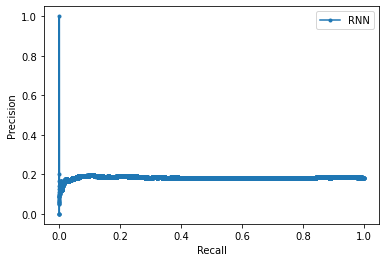




 CompVis
	F1 score:0.47376530402528894
	Precision: 0.5182809050772627
	Recall: 0.500456703306866


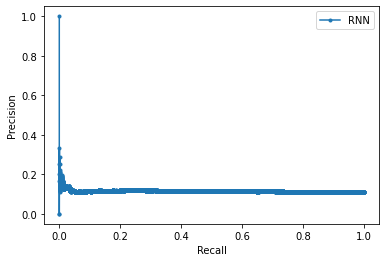




 Math
	F1 score:0.411849071754954
	Precision: 0.4180480860487188
	Recall: 0.49885608993685915


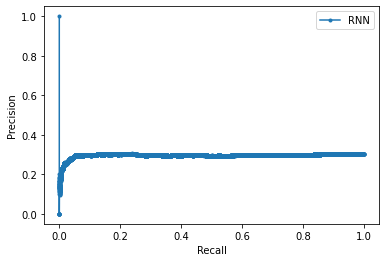


		TEXT PREPROCESSING : 2 for Data Size = 1000



 InfoTheory
	F1 score:0.45055706825454167
	Precision: 0.4778397616974909
	Recall: 0.4996778591916501


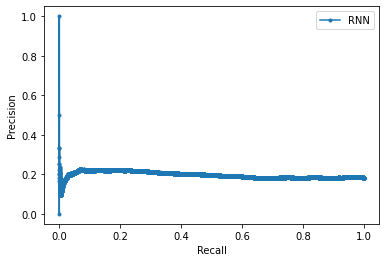




 CompVis
	F1 score:0.4739536811363355
	Precision: 0.5426198395727976
	Recall: 0.5007990518176499


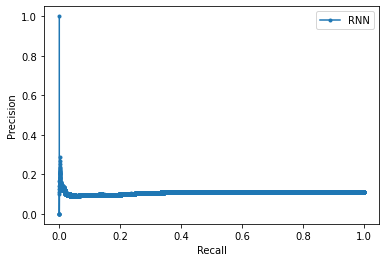




 Math
	F1 score:0.4120636731066467
	Precision: 0.4361313383650473
	Recall: 0.49929251705353067


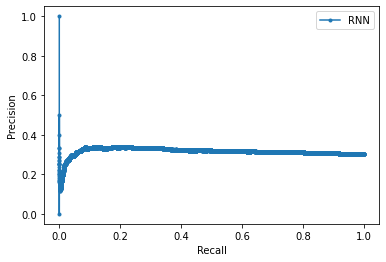

In [28]:
for pre_processing_step in [1, 2]:
    if pre_processing_step == 1:
        train_iterator = train_1_iterator
        test_iterator = test_1_iterator
        print('\n\t\tTEXT PREPROCESSING :', pre_processing_step, 'for Data Size = 1000')
    if pre_processing_step == 2:
        train_iterator = train_2_iterator
        test_iterator = test_2_iterator
        print('\n\t\tTEXT PREPROCESSING :', pre_processing_step, 'for Data Size = 1000')

    for target in label:
        
        best_test_loss = float('inf')
        print('\n')
        for epoch in range(N_EPOCHS):

            start_time = time.time()

            train_loss, train_acc = train(model, train_iterator, optimizer, criterion, target)
            test_loss, test_acc = evaluate(model, test_iterator, criterion, target)

            end_time = time.time()
            epoch_mins, epoch_secs = epoch_time(start_time, end_time)

            if test_loss < best_test_loss:
                best_test_loss = test_loss
                torch.save(model.state_dict(), 'RNN_model.pt')
#             print(f'\tEpoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
#             print(f'\t\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
#             print(f'\t\tTest. Loss: {test_loss:.3f} | Test. Acc: {test_acc*100:.2f}%')
        y_predict = []
        y_test = []
        y_probs = []
        model.eval()
        
        with torch.no_grad():
            for batch in test_iterator:
                predictions = model(batch.Abstract).squeeze(1)
                rounded_preds = torch.round(torch.sigmoid(predictions))
                probs = torch.sigmoid(predictions)
                y_probs += probs.tolist()
                y_predict += rounded_preds.tolist()
                y_test += getattr(batch, target).tolist()
        y_predict = np.asarray(y_predict)
        y_test = np.asarray(y_test)
        y_probs = np.asarray(y_probs)
        recall=recall_score(y_test,y_predict,average='macro')
        precision=precision_score(y_test,y_predict,average='macro')
        f1score=f1_score(y_test,y_predict,average='macro')
        print('\n', target)
        print('\tF1 score:'+ str(f1score))
        print('\tPrecision: '+ str(precision))
        print('\tRecall: '+ str(recall))
        
        rnn_precision, rnn_recall, _ = precision_recall_curve(y_test, y_probs)
        plt.plot(rnn_recall, rnn_precision, marker='.', label='RNN')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend()
        plt.show()

From the above statistics and plots we can see that the RNN is not better then the linear SVC model which we used earlier. This is happening because we set the epoch less. Each epoch takes times to run and update the values. If we increase the epoch the weights and bias will be much more closer to help get the prediction value. But this will take a very long time to run. So for now i'm using only 5 epochs.  

#### 1.12. 3. 2. Read data : Text Preprocessing = 1 + 2 : Data size = ALL

In [29]:
PATH_2 = r'./assignment1_data' 

datafields_1 = [("ID", None),
                ("URL", None),
                ("Date", None),
                ("Title", None),
                ("InfoTheory", LABEL_1),
                ("CompVis", LABEL_1),
                ("Math", LABEL_1),
                ("Abstract", TEXT_1)]

datafields_2 = [("ID", None),
                ("URL", None),
                ("Date", None),
                ("Title", None),
                ("InfoTheory", LABEL_2),
                ("CompVis", LABEL_2),
                ("Math", LABEL_2),
                ("Abstract", TEXT_2)]

# %%time
train_1_all_data, test_1_all_data = TabularDataset.splits(
    path=PATH_2, 
    train='axcs_train.csv', 
    test='axcs_test.csv',
    format='csv',
    skip_header=True,
    fields=datafields_1)

train_2_all_data, test_2_all_data = TabularDataset.splits(
    path=PATH_2, 
    train='axcs_train.csv', 
    test='axcs_test.csv',
    format='csv',
    skip_header=True,
    fields=datafields_2)

#### 1.12. 4. 2. Max Vocab Size : Text Preprocessing = 1 + 2 : Data size = All

In [30]:
MAX_VOCAB_SIZE = 5400

TEXT_1.build_vocab(train_1_all_data, max_size = MAX_VOCAB_SIZE)
LABEL_1.build_vocab(train_1_all_data)
print(f"Unique tokens in TEXT vocabulary: {len(TEXT_1.vocab)}")

TEXT_2.build_vocab(train_2_all_data, max_size = MAX_VOCAB_SIZE)
LABEL_2.build_vocab(train_2_all_data)
print(f"Unique tokens in TEXT vocabulary: {len(TEXT_2.vocab)}")

Unique tokens in TEXT vocabulary: 5402
Unique tokens in TEXT vocabulary: 5402


#### 1.12. 5. 2. Bucket Iterator : TP = 1 + 2 : Data size = All

In [31]:
BATCH_SIZE = 64

train_all_iterator, test_1_iterator = data.BucketIterator.splits(
    (train_1_all_data, test_1_all_data), 
    batch_size = BATCH_SIZE,
    device = device,
    sort_key = lambda x: len(x.Abstract),
    sort_within_batch = False)

train_all_iterator, test_2_iterator = data.BucketIterator.splits(
    (train_2_all_data, test_2_all_data), 
    batch_size = BATCH_SIZE,
    device = device,
    sort_key = lambda x: len(x.Abstract),
    sort_within_batch = False)

#### 1.12.7.2. Data size = All : Text Pre = 1 + 2 : Task = InfoTheory + CompVis + Math : Evaluation = F1 + Precision + Recall


		TEXT PREPROCESSING : 1 for Data Size = All

 InfoTheory
	F1 score:0.45038223112481995
	Precision: 0.47951287626999073
	Recall: 0.49975749047110585


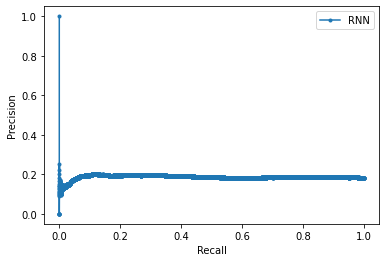


 CompVis
	F1 score:0.4729246555217473
	Precision: 0.5078355738873612
	Recall: 0.5001631935473881


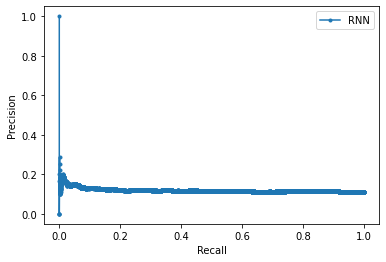


 Math
	F1 score:0.4117564013212209
	Precision: 0.43255462812160694
	Recall: 0.49951236200047006


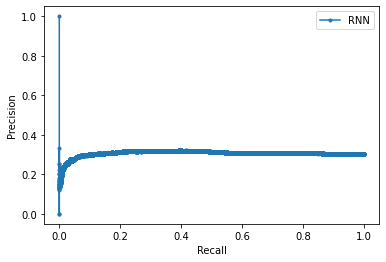


		TEXT PREPROCESSING : 2 for Data Size = All

 InfoTheory
	F1 score:0.4495700068055095
	Precision: 0.44251879098874913
	Recall: 0.49943605558328735


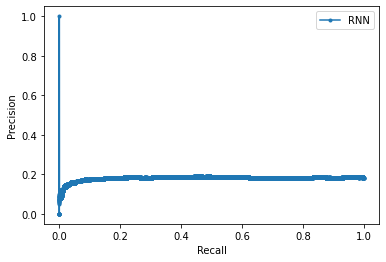


 CompVis
	F1 score:0.47225578517701433
	Precision: 0.5203403194628141
	Recall: 0.5002120322986942


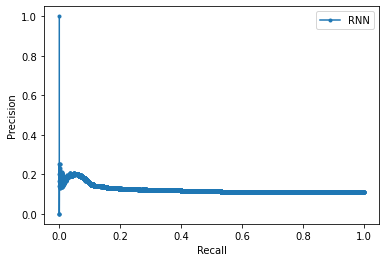


 Math
	F1 score:0.41177418088993234
	Precision: 0.4354358649470623
	Recall: 0.4995487309268593


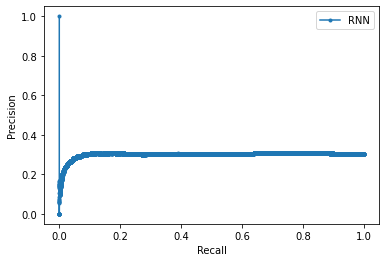

In [32]:
for pre_processing_step in [1, 2]:
    if pre_processing_step == 1:
        train_iterator = train_1_iterator
        test_iterator = test_1_iterator
        print('\n\t\tTEXT PREPROCESSING :', pre_processing_step, 'for Data Size = All')
    if pre_processing_step == 2:
        train_iterator = train_2_iterator
        test_iterator = test_2_iterator
        print('\n\t\tTEXT PREPROCESSING :', pre_processing_step, 'for Data Size = All')
    
    for target in label:
        
        best_test_loss = float('inf')

        for epoch in range(N_EPOCHS):

            start_time = time.time()

            train_loss, train_acc = train(model, train_iterator, optimizer, criterion, target)
            test_loss, test_acc = evaluate(model, test_iterator, criterion, target)

            end_time = time.time()
            epoch_mins, epoch_secs = epoch_time(start_time, end_time)

            if test_loss < best_test_loss:
                best_test_loss = test_loss
                torch.save(model.state_dict(), 'RNN_model.pt')
#             print(f'\tEpoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
#             print(f'\t\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
#             print(f'\t\tTest. Loss: {test_loss:.3f} | Test. Acc: {test_acc*100:.2f}%')
        y_predict = []
        y_test = []
        y_probs = []
        model.eval()
        
        with torch.no_grad():
            for batch in test_iterator:
                predictions = model(batch.Abstract).squeeze(1)
                rounded_preds = torch.round(torch.sigmoid(predictions))
                probs = torch.sigmoid(predictions)
                y_probs += probs.tolist()
                y_predict += rounded_preds.tolist()
                y_test += getattr(batch, target).tolist()
        y_predict = np.asarray(y_predict)
        y_test = np.asarray(y_test)
        y_probs = np.asarray(y_probs)
        recall=recall_score(y_test,y_predict,average='macro')
        precision=precision_score(y_test,y_predict,average='macro')
        f1score=f1_score(y_test,y_predict,average='macro')
        print('\n', target)
        print('\tF1 score:'+ str(f1score))
        print('\tPrecision: '+ str(precision))
        print('\tRecall: '+ str(recall))
        
        rnn_precision, rnn_recall, _ = precision_recall_curve(y_test, y_probs)
        plt.plot(rnn_recall, rnn_precision, marker='.', label='RNN')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend()
        plt.show()

From the above statistical score and precision recall plots we can see that the model was able to predict a bit better then the 1000 data set. This happen because when the dataset is more, it means sample is more closer to the  population. Which tends to increase the accuracy and other statistical evaluation matrices. 

We are also able to see that the text preprocessing don't have much changes in the score for all dataset. where as we were able to see in 1000 data set that the second text preprocessing was very little better then the first one. This happened because model start to learn from the data and start get close to the prediction. 

# Part 2: TOPIC MODELLING

Topic modelling is a form of statistical modelling that is used to find the abstract "topics" that appear in a set of documents. The subject model Latent Dirichlet Allocation (LDA) is used to classify text in a document to a specific topic. It creates a Dirichlet distribution-based topic per document and word per topic model.

## 2.1. Text Preprocessing 

### 2.1.1. Text Preprocessin = 1

We are using following text preprocessing as first:

1.   NLTK tokenizer
2.   token is numeric
3.   token is not single character
4.   snowball stemming
5.   bigram
6.   k = 10



In [33]:
# TEXT PROCESSING : 1 : K = 10 : 
def TP_1_fun(docs_1):
    
    for idx in range(len(docs_1)):
#           docs_1[idx] = docs_1[idx]  # Convert to lowercase.
          docs_1[idx] = word_tokenize(docs_1[idx])  # Split into words.

    docs_1 = [[stemmer.stem(token) for token in doc if not token.isnumeric() and len(token) > 1] for doc in docs_1]

      # Add bigrams and trigrams to docs (only ones that appear 20 times or more).
    bigram = Phrases(docs_1, min_count=20)
    for idx in range(len(docs_1)):
        for token in bigram[docs_1[idx]]:
            if '_' in token:
                  # Token is a bigram, add to document.
                docs_1[idx].append(token)
                
    k = 10

    return docs_1, k

The papers contain bigrams. Bigrams are groups of two terms that are next to each other. We can get phrases like "machine learning" in our performance using bigrams (spaces are replaced with underscores); we would only get "machine" and "learning" if we didn't use bigrams.


### 2.1.2. Text Preprocessin = 2

We are using following text preprocessing as second:

1.   NLTK tokenizer
2.   Lower case
3.   Keep only alphabetic characters
4.   Remove stopwords
5.   Wordnet Lemmatization



In [34]:
# TEXT PROCESSING : 2 : K = 40 :
def TP_2_fun(docs_2):
    
    for idx in range(len(docs_2)):
        docs_2[idx] = docs_2[idx].lower()  # Convert to lowercase.
        docs_2[idx] = word_tokenize(docs_2[idx])  # Split into words.
        
        # [wordnet_lemmatizer.lemmatize(token) for token in trydoc if not token in stop_words
    docs_2 = [[lemmatizer.lemmatize(token) for token in doc if not token in stop_words and token.isalpha()] for doc in docs_2]
    
    k = 25
    
    return docs_2, k

## 2.2. get_document_topics + top_topics

In [35]:
def get_document_topics(ldamodel, corpus, texts):
   # Init output
    document_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                document_topics_df = document_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    document_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    # Add original text to the end of the output
    contents = pd.Series(texts)
    document_topics_df = pd.concat([document_topics_df, contents], axis=1)
    document_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Original_Text']

    return document_topics_df

def top_topics():
    doc_topic_df = get_document_topics(ldamodel=model, corpus=corpus, texts=raw_data)
    # Group top 5 sentences under each topic
    doc_topics_sorted_df = pd.DataFrame()
    doc_topic_df_grpd = doc_topic_df.groupby('Dominant_Topic')
    for i, grp in doc_topic_df_grpd:
        doc_topics_sorted_df = pd.concat([doc_topics_sorted_df, 
                                          grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                         axis=0)
    doc_topics_sorted_df.reset_index(drop=True, inplace=True)
    doc_topics_sorted_df.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]
    return doc_topics_sorted_df

## 2.3. Divide data

In [36]:
train_1000 = train_all.head(1000)
train_20000 = train_all.head(20000)

In [37]:
!pip install pyLDAvis==2.1.2
import pyLDAvis.gensim

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


### 2.4.1 Model : Visualization : Article = 1000 : Text Preprocessin = 1

In [38]:
# TP = 1 : Article = 1000 
docs_1000_1 = train_1000['Abstract'].tolist()
raw_data = docs_1000_1.copy()
docs_1000_1, k = TP_1_fun(docs_1000_1)

docs_all = docs_1000_1
dictionary = Dictionary(docs_all)
dictionary.filter_extremes(no_below=20, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in docs_all]

NUM_TOPICS = k
passes = 20
iterations = 400
eval_every = None 
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every)

lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


1. First 1000 papers and text pre-processing: 
Except for bubbles 2, 4, and 6, 3, every topic grouping is separated in a different way. Bubbles 2 and 4 are overlapping bubbles 6 and 3 respectively. This indicates that some terms in bubbles 2 and 4 are identical, such as model, corpus, title, and many others. The majority of the words are unable to adequately convey any information about the subject. I'm not able to see proper come up with the head for the terms in each bubble because it was trained on such a small data set. However, when I made the necessary adjustments and scanned for bubble number ten, I discovered that it was missing. I read the first few lines of the article "An Extended Clustering Algorithm for..." to learn more about the topic. This subject seems to be about language encoding, as far as I can tell.

### 2.5.1 Top topics : Article = 1000 : Text Preprocessin = 1

In [39]:
doc_topics_sorted_df = top_topics()
doc_topics_sorted_df.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9970,"model, word, tag, by, method, which, order, be...",Combining Trigram-based and Feature-based Met...
1,1.0,0.9949,"semant, from, relat, by, present, generat, thi...",Semantics of Complex Sentences in Japanese Th...
2,2.0,0.9966,"pars, algorithm, parser, sentenc, which, by, m...",Path optimization and near-greedy analysis fo...
3,3.0,0.9975,"it, as, verb, which, by, word, algorithm, 's, ...",Dynamic Non-Bayesian Decision Making The mode...
4,4.0,0.9970,"learn, model, languag, as, system, approach, i...",Transfer in a Connectionist Model of the Acqu...
5,5.0,0.9968,"algorithm, be, translat, generat, can, text, f...",When Gravity Fails: Local Search Topology Loc...
6,6.0,0.9974,"speech, plan, discours, model, languag, proble...","Centering, Anaphora Resolution, and Discourse..."
7,7.0,0.9968,"system, word, text, approach, process, evalu, ...",SCREEN: Learning a Flat Syntactic and Semanti...
8,8.0,0.9975,"be, languag, can, logic, it, semant, system, a...",A Principled Framework for Constructing Natur...
9,9.0,0.9971,"grammar, as, be, lexic, structur, by, formal, ...",An Abstract Machine for Unification Grammars ...


### 2.4.2 Model : Visualization : Article = 1000 : Text Preprocessin = 2

In [40]:
# TP = 2 : Article = 1000 
docs_1000_2 = train_1000['Abstract'].tolist()
raw_data = docs_1000_2.copy()
docs_1000_2, k = TP_2_fun(docs_2 = docs_1000_2)

docs_all = docs_1000_2
dictionary = Dictionary(docs_all)
dictionary.filter_extremes(no_below=20, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in docs_all]

NUM_TOPICS = k
chunksize = 2000
passes = 20
iterations = 400
eval_every = None 
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
    )

lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

2. Text pre-processing 1 and first 20,000 posts: I was able to discern the topics from the words more clearly when I tested the same text pre-processing in the first 20,000 articles. Networks were listed in bubble 4 as well. I have noticed that bubble 1 and bubble 5 have a lot in common and are all about bound algorithms. The majority of the terms are also identical in both of them, with the exception of a few bigrams such as lower bound. This indicates that a topic collection number of k can be reduced by one. In the subjects, I can also see a lot of stop words. These stop words make it difficult to differentiate between details about the various topics. These stop words make it difficult to differentiate between details about the various topics. I was also able to see some stemmed terms, such as pars, that had no context for the topics. I could even make out some punctuation marks as words. As a result, for the second text pre-processing, I removed stop words and used nltk's word nett lemmatization.

### 2.5.2 Top topics : Article = 1000 : Text Preprocessin = 2

In [41]:
doc_topics_sorted_df = top_topics()
doc_topics_sorted_df.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9913,"grammar, feature, structure, formalism, tree, ...",Parsing with Typed Feature Structures In this...
1,1.0,0.9941,"language, speech, processing, approach, system...",SCREEN: Learning a Flat Syntactic and Semanti...
2,2.0,0.9900,"semantic, lexical, lexicon, verb, representati...",Design and Implementation of a Computational ...
3,3.0,0.9918,"problem, learning, data, model, method, algori...",Learning Word Association Norms Using Tree Cu...
4,4.0,0.9884,"parsing, parser, algorithm, sentence, grammar,...",A Linear Observed Time Statistical Parser Bas...
5,5.0,0.9923,"algorithm, problem, plan, approach, function, ...",Dynamic Non-Bayesian Decision Making The mode...
6,6.0,0.9932,"sentence, noun, language, approach, phrase, sy...",Combining Hand-crafted Rules and Unsupervised...
7,7.0,0.9887,"discourse, centering, pronoun, resolution, jap...",Semantics of Complex Sentences in Japanese Th...
8,8.0,0.9932,"system, agent, theory, search, strategy, probl...",Rerepresenting and Restructuring Domain Theor...
9,9.0,0.9905,"clause, problem, set, inference, language, pro...",Generalization of Clauses under Implication I...


### 2.4.3 Model : Visualization : Article = 20,000 : Text Preprocessin = 1

In [42]:
# TP = 1 : Dataset = 20000 
docs_20000_1 = train_20000['Abstract'].tolist()
raw_data = docs_20000_1.copy()
docs_20000_1, k = TP_1_fun(docs_20000_1)

docs_all = docs_20000_1
dictionary = Dictionary(docs_all)
dictionary.filter_extremes(no_below=20, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in docs_all]

NUM_TOPICS = k
chunksize = 2000
passes = 20
iterations = 400
eval_every = None 
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
    )

lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


3. Text pre-processing 2 and the first 1000 articles: For this task's text pre-processing, I used only alphabetic characters, lowercased all the sentences, and increased the subject count to 25. I was able to get more information about each subject when I used the model for the first 1000 pages. We were able to more easily discern the topics for each bubble thanks to the terms. Bubble 3 may, for example, contain extensive details about the English language. Text analysis may be the subject of Bubble 2. Machine learning algorithms are represented by Bubble 6. However, there is a greater concentration of subject groupings. Bubbles 16, 4, 5, and 25 are in near proximity to one another.

### 2.5.3 Top topics : Article = 20000 : Text Preprocessin = 1

In [43]:
doc_topics_sorted_df = top_topics()
doc_topics_sorted_df.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9321,"code, decod, quantum, error, scheme, construct...",Is entanglement necessary to have uncondition...
1,1.0,0.9380,"be, it, as, game, can, sensor, inform, or, not...",Between a rock and a hard place: assessing th...
2,2.0,0.9225,"channel, rate, capac, achiev, receiv, optim, a...",A New Sphere-Packing Bound for Maximal Error ...
3,3.0,0.9841,"graph, problem, algorithm, bound, number, set,...",Maximal f-vectors of Minkowski sums of large ...
4,4.0,0.9862,"system, data, applic, as, develop, paper, it, ...",GridBank: A Grid Accounting Services Architec...
5,5.0,0.9891,"as, be, logic, model, function, system, it, pr...",Applications of Intuitionistic Logic in Answe...
6,6.0,0.9033,"model, imag, distribut, data, method, as, esti...",Fat Tailed Distributions in Catastrophe Predi...
7,7.0,0.9466,"algorithm, problem, optim, method, propos, com...",Random Shuffling to Reduce Disorder in Adapti...
8,8.0,0.9117,"network, node, interfer, wireless, propos, pro...",Performance Analysis of QoS in PMP Mode WiMax...
9,9.0,0.9674,"learn, compress, signal, process, from, model,...",Pattern Based Term Extraction Using ACABIT Sy...


## 2.4.4 Model : Visualization : Article = 20,000 : Text Preprocessin = 2

In [44]:
# TP = 2 : Dataset = 20000 
docs_20000_2 = train_20000['Abstract'].tolist()
raw_data = docs_20000_2.copy()
docs_20000_2, k = TP_2_fun(docs_20000_2)

docs_all = docs_20000_2
dictionary = Dictionary(docs_all)
dictionary.filter_extremes(no_below=20, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in docs_all]

NUM_TOPICS = k
chunksize = 2000
passes = 20
iterations = 400
eval_every = None 
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
    )

lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


4. Text pre-processing 2 and the first 20,000 posts: We will use this text pre-processing on a larger number of articles to solve this problem. In the first 20,000 pages, I repeated the text pre-processing stage. I was able to differentiate the topics much easier after doing so. Bubble 21, for example, is discussing being social. Power transfer is what bubble 8 is all about. Machine learning and other topics are discussed in Bubble 24. I was also able to figure out that the term pars meant parsing thanks to lemmatization. 
I have calculated the percentage contribution of keywords and topics. To comprehend the meaning of words in that topic for the article's significance.

### 2.5.4 Top topics : Article = 20000 : Text Preprocessin = 2

In [45]:
doc_topics_sorted_df = top_topics()
doc_topics_sorted_df.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.6271,"system, control, detection, dynamic, agent, pr...",Gemini MCAO Control System The Gemini Observa...
1,1.0,0.8017,"quantum, theory, classical, state, algebra, co...",Algorithmic Information Theoretic Issues in Q...
2,2.0,0.5986,"sensor, number, transmit, large, decoder, law,...",Adaptive evolution on neutral networks We stu...
3,3.0,0.6726,"image, method, using, vector, equation, space,...",Geometric Morphology of Granular Materials We...
4,4.0,0.8274,"graph, tree, set, edge, vertex, path, time, di...",Interval greedoids and families of local maxi...
5,5.0,0.5621,"matrix, sensing, spectrum, cognitive, et, prim...",Removing bias due to finite measurement of dy...
6,6.0,0.9091,"application, paper, design, software, research...",Second Product Line Practice Workshop Report ...
7,7.0,0.7224,"service, resource, scheduling, distributed, ac...",Economic Models for Management of Resources i...
8,8.0,0.8369,"code, decoding, error, binary, coding, linear,...",New Construction of A Family of Quasi-Twisted...
9,9.0,0.6368,"network, node, relay, wireless, region, link, ...",Mobility Prediction in Wireless Ad Hoc Networ...


# References:



1.   https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
2.   

